In [1]:
import numpy as np

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('data/StudentsPerformance.xls')

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

In [10]:
#check for missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
#check duplicates
df.duplicated().sum()

0

In [12]:
#checks null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
#checking for the number unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [18]:
#define numerical and categorical values 
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']    
print('we have {} numeric features :{}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features :{}'.format(len(categorical_features),categorical_features)) 

we have 3 numeric features :['math score', 'reading score', 'writing score']
we have 5 categorical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
#Adding columns for total scores and 'Average' what we are gonna to be predict
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average']=df['total score']//3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76


In [24]:
#now we can say that our total and average score are the dependent features and rest are the independent features
#now we will put out the the students with full marks in specific subjects 
reading_full = (df['reading score'] == 100).sum()
writing_full = (df['writing score'] == 100).sum()
math_full    = (df['math score'] == 100).sum()

print(f'nu. of stu. with full marks in math : {math_full}')
print(f'nu. of stu. with full marks in writing : {writing_full}')   
print(f'nu. of stu. with full marks in reading : {reading_full}')

nu. of stu. with full marks in math : 7
nu. of stu. with full marks in writing : 14
nu. of stu. with full marks in reading : 17


In [26]:
#no. of students with less than 20 marks
reading_less_20=(df['reading score']<20).sum()
writing_less_20=(df['writing score']<20).sum()
math_less_20=(df['math score']<20).sum()
print(f"no: of stu with less than 20 marks:{reading_less_20}")
print(writing_less_20)
print(math_less_20)


no: of stu with less than 20 marks:1
3
4


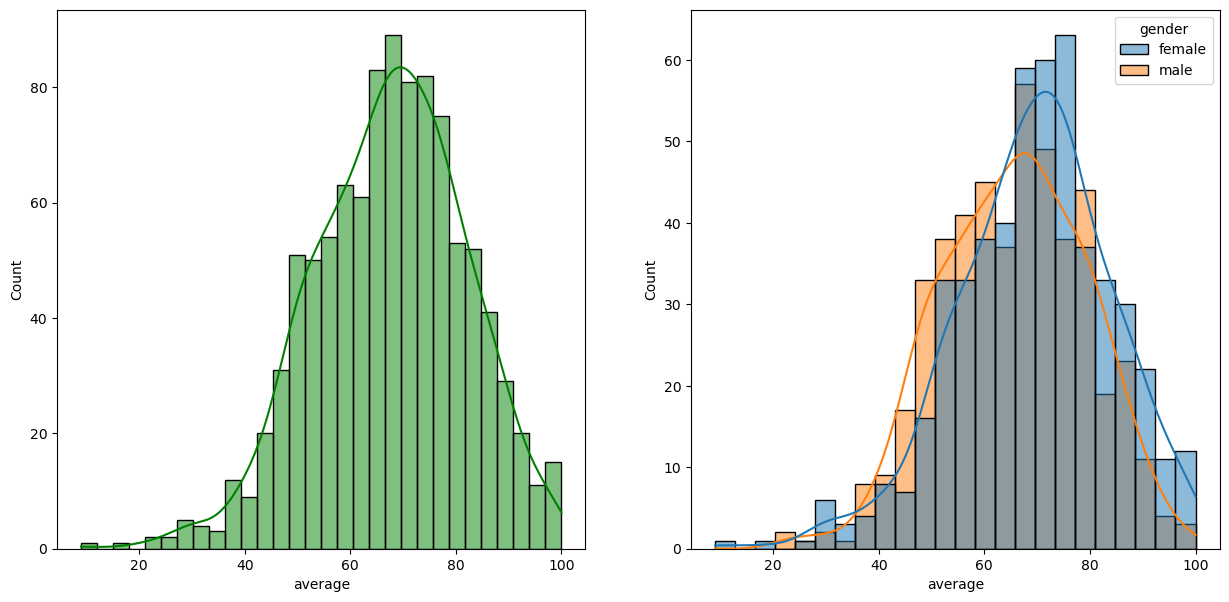

In [27]:
#histogram and KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

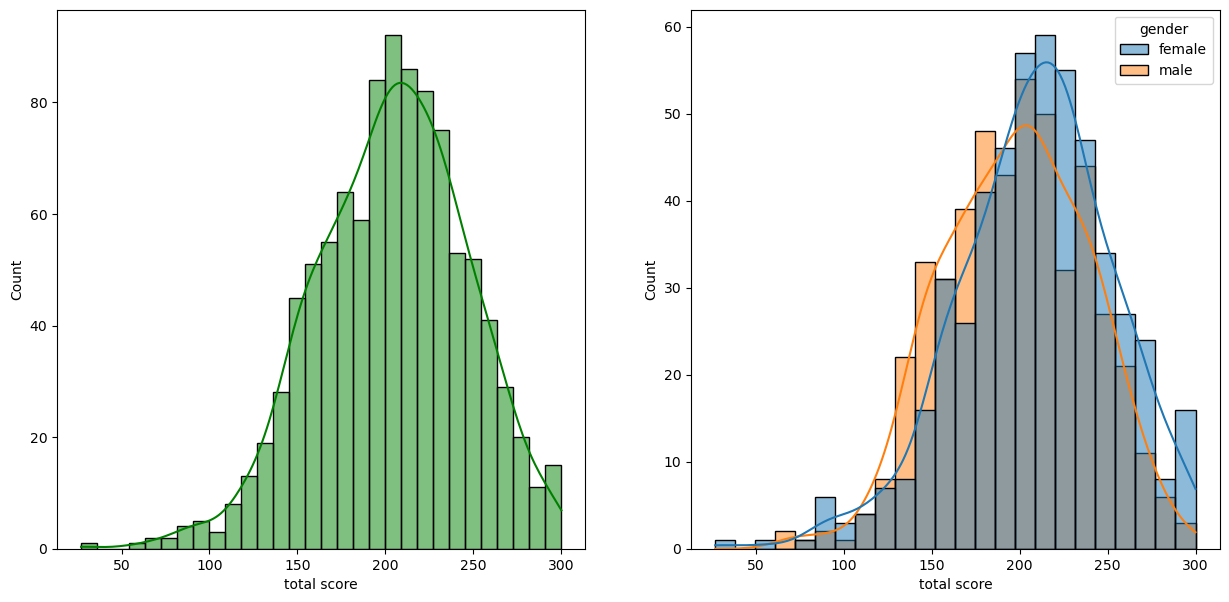

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()